<a href="https://colab.research.google.com/github/trungnguyen020/6351071072_LAB2/blob/main/6351071072_LAB2_Bai5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bài 5 trang 26,27 câu a
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Đọc dữ liệu
try:
    df = pd.read_csv('heart.csv', sep=None, engine='python')
except:
    df = pd.read_csv('heart.csv')
new_column_names = {
    'age': 'age',
    'sex': 'sex',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'rest_ecg',
    'thalach': 'max_heart_rate_achieved',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia',
    'target': 'target'
}
df.rename(columns=new_column_names, inplace=True)

# 3. Xóa dữ liệu trống
df.dropna(inplace=True)

print("Đã nhập và xử lý dữ liệu Heart Disease thành công.")
print(f"Tổng số dòng: {len(df)}")
print("Danh sách cột mới:")
print(df.columns.tolist())

print("Nguyễn Đức Trung - 6351071072")

Đã nhập và xử lý dữ liệu Heart Disease thành công.
Tổng số dòng: 303
Danh sách cột mới:
['\ufeffage', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
Nguyễn Đức Trung - 6351071072


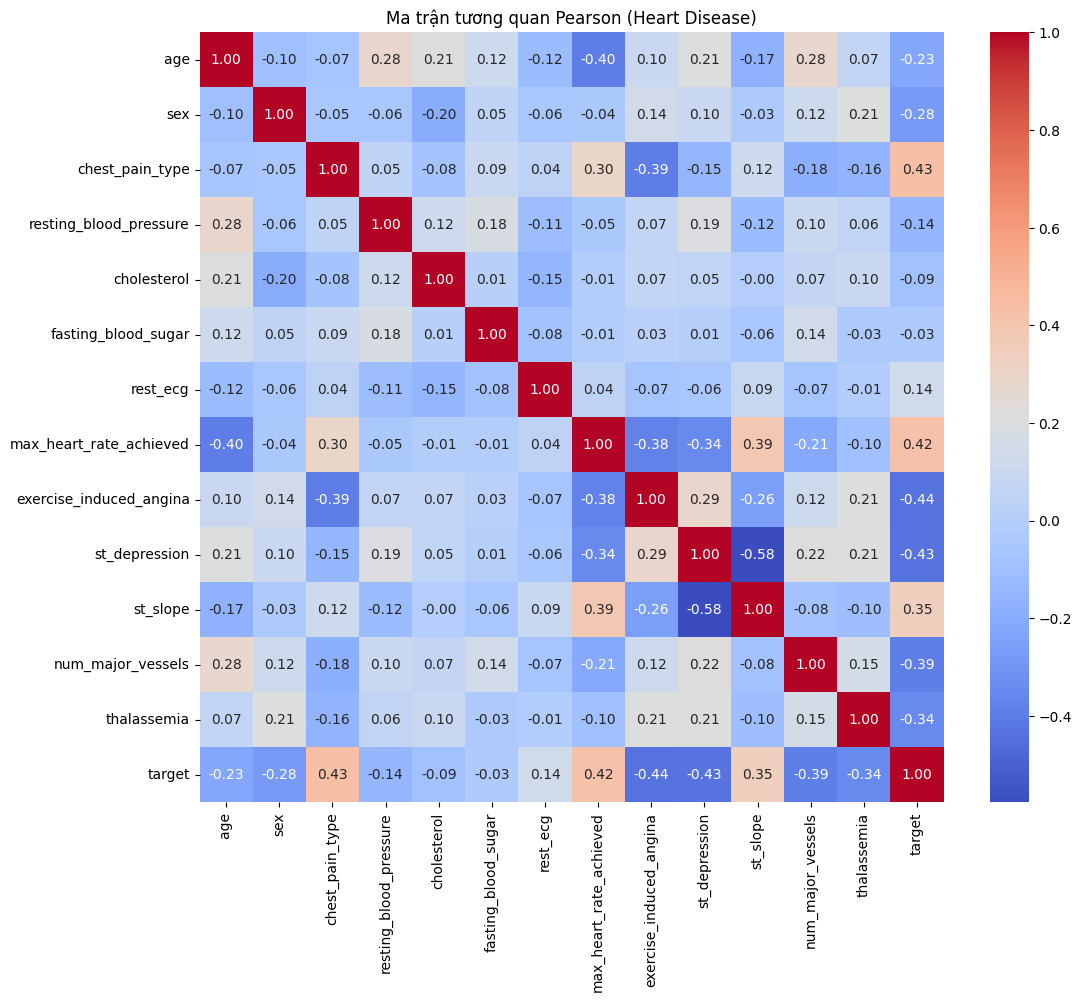

Không có cột nào có độ tương đồng quá cao (> 0.9).
Nguyễn Đức Trung - 6351071072


In [2]:
# bài 5 trang 26,27 câu 3

# 1. Tính ma trận tương quan
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr(method='pearson')

# 2. Vẽ Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Ma trận tương quan Pearson (Heart Disease)")
plt.show()

# 3. Loại bỏ cột tương đồng cao (> 0.9) - Trừ cột target
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.9) and column != 'target']

if to_drop:
    df.drop(to_drop, axis=1, inplace=True)
    print("Đã loại bỏ các cột trùng lặp:", to_drop)
else:
    print("Không có cột nào có độ tương đồng quá cao (> 0.9).")

print("Nguyễn Đức Trung - 6351071072")

In [3]:
# bài 5 trang 26,27 câu 4

target_col = 'target'

# Tách X và y
X = df.drop(target_col, axis=1)
y = df[target_col]

print("Đã tách xong X và y.")
print(f"Kích thước X: {X.shape}")
print(f"Kích thước y: {y.shape}")

print("Nguyễn Đức Trung - 6351071072")

Đã tách xong X và y.
Kích thước X: (303, 13)
Kích thước y: (303,)
Nguyễn Đức Trung - 6351071072


In [4]:
# bài 5 trang 26,27 câu 5

# 1. Mã hóa One-Hot cho X
X_encoded = pd.get_dummies(X, columns=['chest_pain_type', 'thalassemia', 'st_slope'], drop_first=True)
# Lưu ý: Nếu muốn giữ nguyên dạng số thì dùng: X_encoded = pd.get_dummies(X, drop_first=True)
# Nhưng tốt nhất với bài này nên chỉ định cột category nếu biết, hoặc để mặc định như dưới đây cho an toàn:
X_encoded = pd.get_dummies(X, drop_first=True)

# 2. Mã hóa Label Encoder cho y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"Kích thước X sau khi mã hóa: {X_encoded.shape}")
print(f"Các lớp nhãn (target): {le.classes_}")

print("Nguyễn Đức Trung - 6351071072")

Kích thước X sau khi mã hóa: (303, 13)
Các lớp nhãn (target): [0 1]
Nguyễn Đức Trung - 6351071072


In [5]:
# bài 5 trang 26,27 câu 6

# Chia dữ liệu: 70% Train - 30% Test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

print("Đã chia dữ liệu thành công (70-30):")
print(f"Train set: {X_train.shape}")
print(f"Test set:  {X_test.shape}")

print("Nguyễn Đức Trung - 6351071072")

Đã chia dữ liệu thành công (70-30):
Train set: (212, 13)
Test set:  (91, 13)
Nguyễn Đức Trung - 6351071072


Độ chính xác ID3: 72.53%


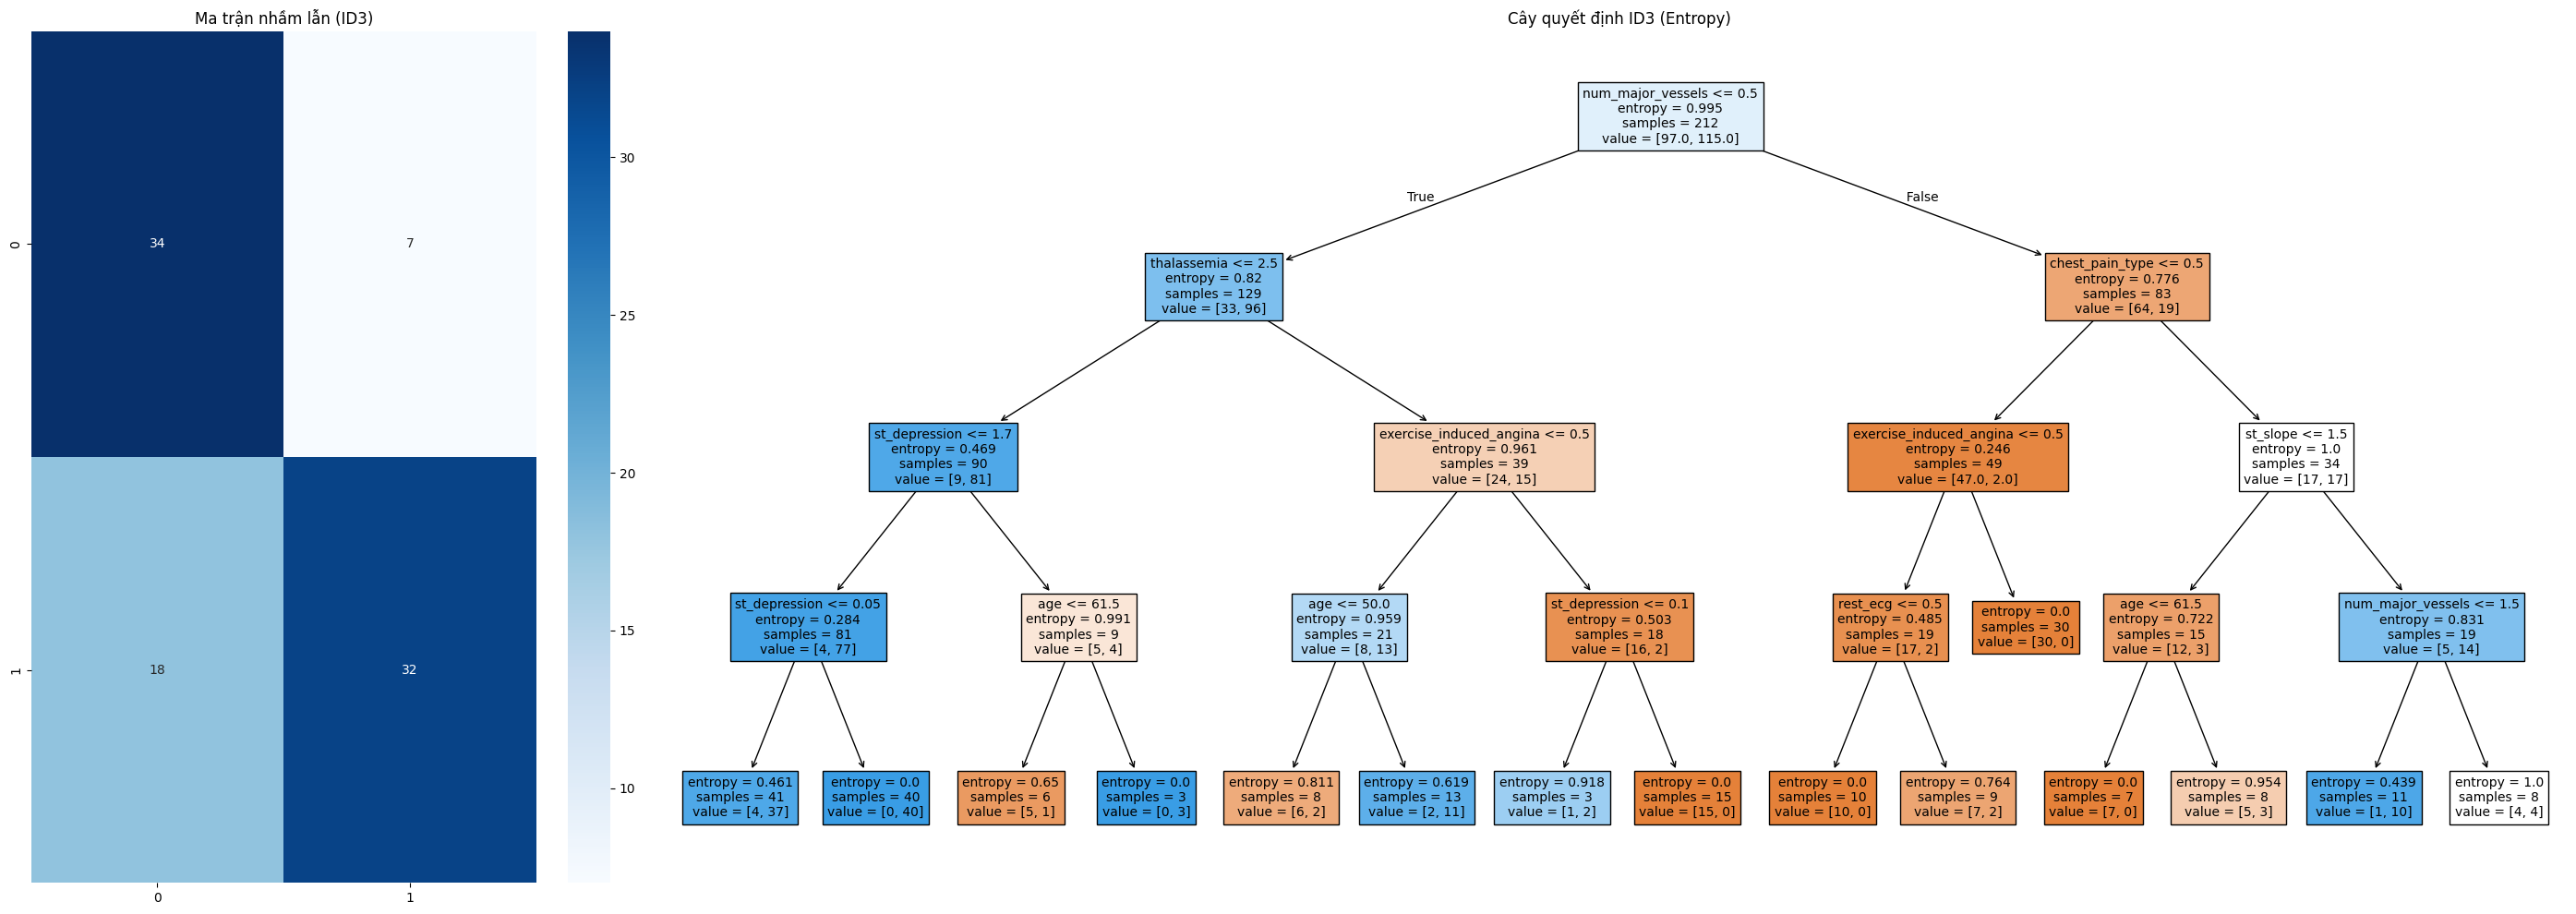

Nguyễn Đức Trung - 6351071072


In [6]:
# bài 5 trang 26,27 câu 7

# 1. Huấn luyện ID3
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=4)
id3_model.fit(X_train, y_train)

# 2. Dự đoán
y_pred_id3 = id3_model.predict(X_test)
acc_id3 = accuracy_score(y_test, y_pred_id3)
conf_matrix_id3 = confusion_matrix(y_test, y_pred_id3)

print(f"Độ chính xác ID3: {acc_id3 * 100:.2f}%")

# 3. Vẽ hình
fig, ax = plt.subplots(1, 2, figsize=(28, 10), gridspec_kw={'width_ratios': [1, 3]})
sns.heatmap(conf_matrix_id3, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Ma trận nhầm lẫn (ID3)")

plot_tree(id3_model, feature_names=X_encoded.columns, filled=True, fontsize=10, ax=ax[1])
ax[1].set_title("Cây quyết định ID3 (Entropy)")

plt.tight_layout()
plt.savefig('heart_id3.png', dpi=100)
plt.show()

print("Nguyễn Đức Trung - 6351071072")

Độ chính xác CART: 73.63%


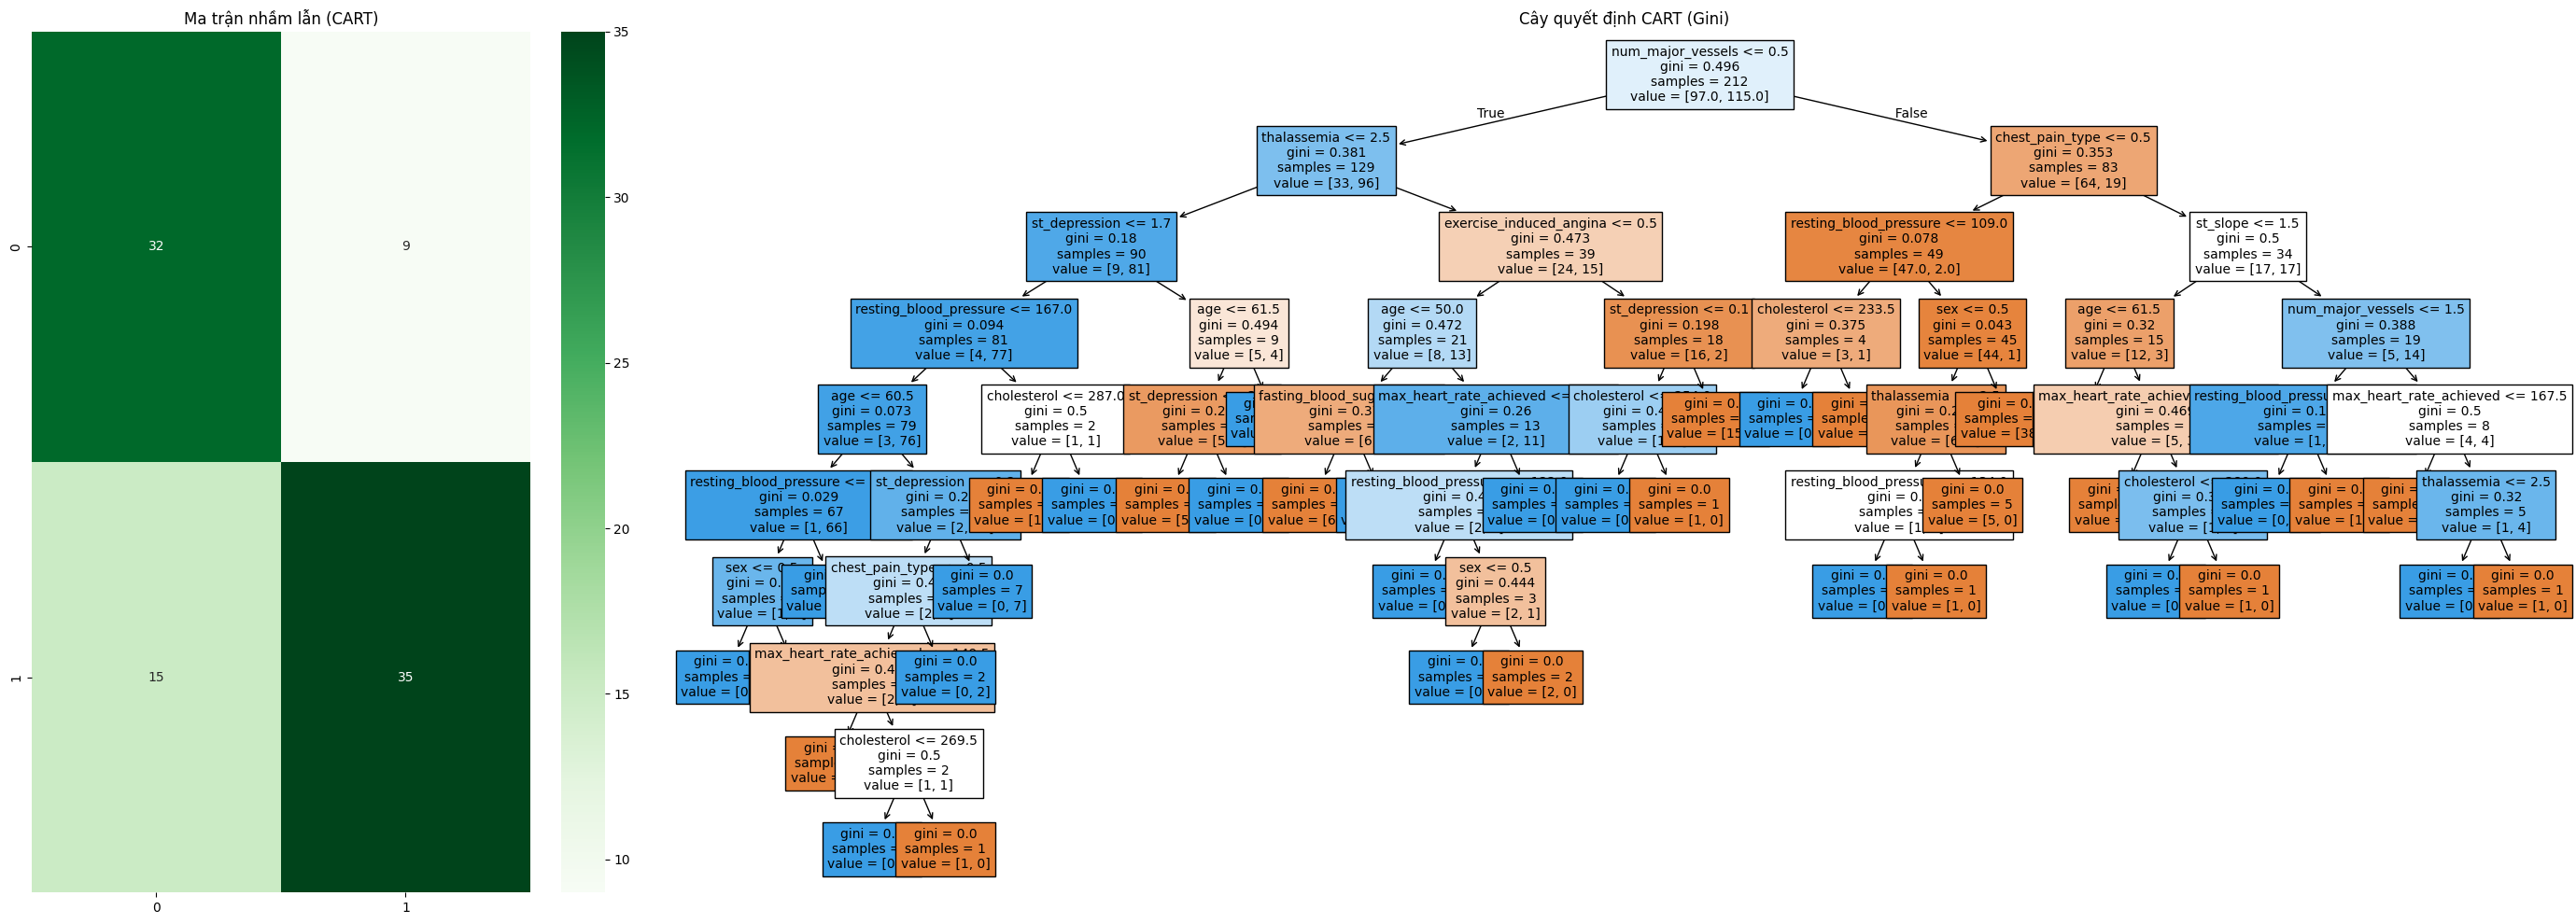

Nguyễn Đức Trung - 6351071072


In [10]:
# bài 5 trang 26,27 câu 8

# 1. Huấn luyện CART
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=None)
cart_model.fit(X_train, y_train)

# 2. Dự đoán
y_pred_cart = cart_model.predict(X_test)
acc_cart = accuracy_score(y_test, y_pred_cart)
conf_matrix_cart = confusion_matrix(y_test, y_pred_cart)

print(f"Độ chính xác CART: {acc_cart * 100:.2f}%")

# 3. Vẽ hình
fig, ax = plt.subplots(1, 2, figsize=(28, 10), gridspec_kw={'width_ratios': [1, 3]})
sns.heatmap(conf_matrix_cart, annot=True, fmt='d', cmap='Greens', ax=ax[0])
ax[0].set_title("Ma trận nhầm lẫn (CART)")

plot_tree(cart_model, feature_names=X_encoded.columns, filled=True, fontsize=10, ax=ax[1])
ax[1].set_title("Cây quyết định CART (Gini)")

plt.tight_layout()
plt.savefig('heart_cart.png', dpi=100)
plt.show()

print("Nguyễn Đức Trung - 6351071072")

Độ chính xác Naïve Bayes: 83.52%


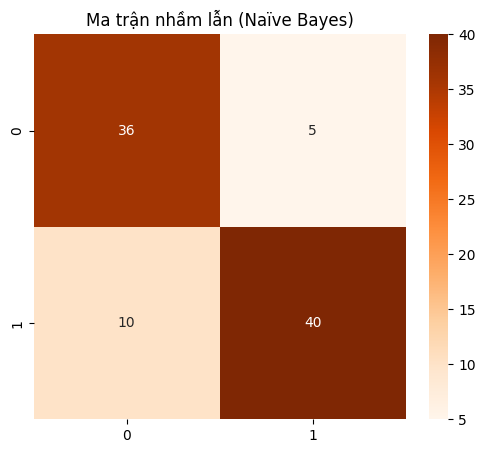

Nguyễn Đức Trung - 6351071072


In [8]:
# bài 5 trang 26,27 câu 9

# Huấn luyện Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Dự đoán
y_pred_nb = nb_model.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print(f"Độ chính xác Naïve Bayes: {acc_nb * 100:.2f}%")

# Vẽ Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Oranges')
plt.title("Ma trận nhầm lẫn (Naïve Bayes)")
plt.show()

print("Nguyễn Đức Trung - 6351071072")

BẢNG SO SÁNH ĐỘ CHÍNH XÁC:
           Model  Accuracy
2    Naïve Bayes  0.835165
0  ID3 (Entropy)  0.725275
1    CART (Gini)  0.725275


/tmp/ipython-input-2370052600.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')


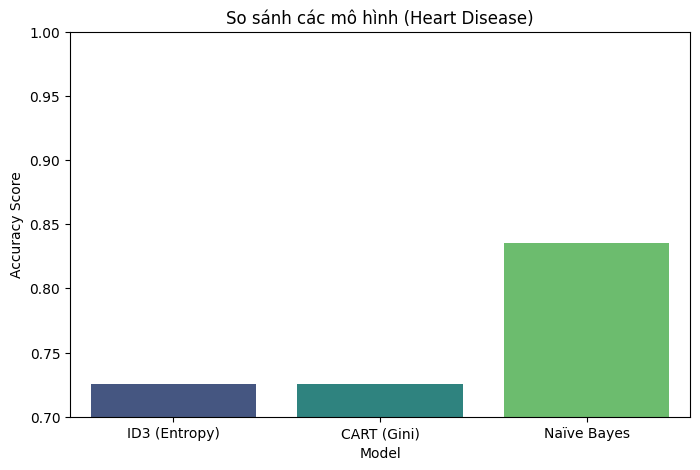

Nguyễn Đức Trung - 6351071072


In [9]:
# bài 5 trang 26,27 câu 10

results = pd.DataFrame({
    'Model': ['ID3 (Entropy)', 'CART (Gini)', 'Naïve Bayes'],
    'Accuracy': [acc_id3, acc_cart, acc_nb]
})

print("BẢNG SO SÁNH ĐỘ CHÍNH XÁC:")
print(results.sort_values(by='Accuracy', ascending=False))

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.ylim(0.7, 1.0)
plt.title("So sánh các mô hình (Heart Disease)")
plt.ylabel("Accuracy Score")
plt.show()

print("Nguyễn Đức Trung - 6351071072")